In [1]:
from typing import Dict
from time import perf_counter_ns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cirq
import openfermion as of
import quimb.tensor as qtn
from adaptvqe.pools import FullPauliPool, TiledPauliPool
from adaptvqe.algorithms.adapt_vqe import TensorNetAdapt, LinAlgAdapt
from adaptvqe.hamiltonians import XXZHamiltonian
from adaptvqe.tensor_helpers import pauli_sum_to_mpo

In [9]:
n_iter = 4
max_mpo_bond = 100
dmrg_mps_bond = 20
adapt_mps_bond = 5
l = 4

In [13]:
j_xy = 1
j_z = 1
h = XXZHamiltonian(j_xy, j_z, l, max_mpo_bond=max_mpo_bond, max_mps_bond=dmrg_mps_bond)
dmrg_energy = h.ground_energy

In [14]:
adapt_energies = []

pool = FullPauliPool(n=l, max_mpo_bond=max_mpo_bond)
tn_adapt = TensorNetAdapt(
    pool=pool,
    custom_hamiltonian=h,
    verbose=True,
    threshold=10**-5,
    max_adapt_iter=30,
    max_opt_iter=10000,
    sel_criterion="gradient",
    recycle_hessian=False,
    rand_degenerate=True,
    max_mpo_bond=max_mpo_bond,
    max_mps_bond=adapt_mps_bond
)
tn_adapt.initialize()

for _ in range(n_iter):
    tn_adapt.run_iteration()
    adapt_energies.append(tn_adapt.energy)


tensor-net-adapt prepared with the following settings:
> Pool: full_pauli_pool
> Custom Hamiltonian: XXZ_1_1
> Orbital Optimization: False
> Selection method: gradient
> Convergence criterion: total_g_norm
> Recycling Hessian: False
> Tetris: False (progressive optimization: False)
> Convergence threshold (gradient norm):  1e-05
> Maximum number of iterations:  30
> candidates per iteration:  1

Initial energy: -3.0000000000000044

*** ADAPT-VQE Iteration 1 ***

Creating list of up to 1 operators ordered by gradient magnitude...

Non-Zero Gradients (tolerance E-8):
Operator 26: -4.000000000000003
Operator 27: 4.000000000000003
Operator 30: -4.000000000000003
Operator 31: 4.000000000000003
Operator 74: 4.000000000000003
Operator 75: -4.000000000000003
Operator 78: 4.000000000000003
Operator 79: -4.000000000000003
Operator 134: 4.000000000000012
Operator 135: -4.000000000000012
Operator 146: -4.000000000000012
Operator 147: 4.000000000000012
Operator 161: -4.000000000000005
Operator 164

/Users/benjamindalfavero/Documents/phd/wellcome/ceo-adapt-vqe/adaptvqe/algorithms/adapt_vqe.py:2492: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  opt_result = minimize_bfgs(
/Users/benjamindalfavero/Documents/phd/wellcome/ceo-adapt-vqe/adaptvqe/algorithms/adapt_vqe.py:2507: UserWarning: Optimizer did not succeed. Message: Desired error not necessarily achieved due to precision loss.
  warn(f"Optimizer did not succeed. Message: {opt_result.message}")


         Current function value: -6.000000
         Iterations: 7
         Function evaluations: 46
         Gradient evaluations: 37

Current energy: -5.999999999929516
(change of -1.7639320224297208)
Current ansatz: [228, 26]

*** ADAPT-VQE Iteration 3 ***

Creating list of up to 1 operators ordered by gradient magnitude...

Non-Zero Gradients (tolerance E-8):
Operator 1: -2.7654560780021598e-05
Operator 4: 2.7654560780021598e-05
Operator 16: 9.714630378798716e-06
Operator 21: 9.714630378798716e-06
Operator 26: 2.354191077091894e-05
Operator 27: -2.0000000000612674
Operator 30: 2.0000000000612674
Operator 31: -2.354191077091894e-05
Operator 38: -1.382728039389658e-05
Operator 39: 1.9999999999941047
Operator 45: -1.9999999999463065
Operator 54: -1.9999999999941045
Operator 55: 1.382728039489578e-05
Operator 57: 1.9999999999463056
Operator 64: -9.714630378909739e-06
Operator 69: -9.714630378909739e-06
Operator 74: -2.354191077091894e-05
Operator 75: 2.000000000061268
Operator 78: -2.00

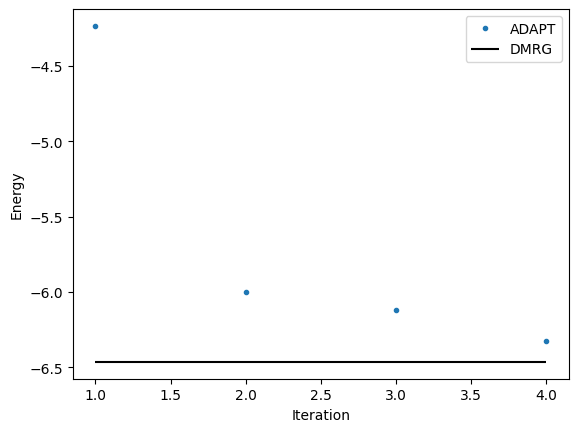

In [17]:
fig, ax = plt.subplots()
ax.plot(range(1, len(adapt_energies) + 1), adapt_energies, '.', label="ADAPT")
ax.hlines(dmrg_energy, 1., len(adapt_energies), color="k", label="DMRG")
ax.set_xlabel("Iteration")
ax.set_ylabel("Energy")
ax.legend()